<a href="https://colab.research.google.com/github/madhurapi/ML-Projects/blob/main/Pumpkin_Seeds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Abstract: 
#     Pumpkin seeds are frequently consumed as confection worldwide because of their adequate amount of protein, 
#     fat, carbohydrate, and mineral contents. This study was carried out on the two most important and 
#     quality types of pumpkin seeds, ‘‘Urgup_Sivrisi’’ and ‘‘Cercevelik’’, generally grown in Urgup and 
#     Karacaoren regions in Turkey. However, morphological measurements of 2500 pumpkin seeds of both varieties 
#     were made possible by using the gray and binary forms of threshold techniques. 
    
#     Considering morphological features, 
#     all the data were modeled with five different machine learning methods: 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Keywords Pumpkin seed  Logistic regression, 
# Multilayer peceptrons, Random forest, Classification, Support vector machine, Thresholding.

In [ ]:
import os
import pandas as pd 
import warnings 
warnings.filterwarnings('ignore') 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy
from scipy import stats 
import statsmodels.api as sm 
from statsmodels.formula.api import ols 
from statsmodels.stats.multicomp import pairwise_tukeyhsd 
from scipy.stats import chi2, chi2_contingency
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
file = pd.read_excel(open('/content/drive/MyDrive/Colab Notebooks/ML Basic Projects/Pumpkin_Seeds_Dataset.xlsx','rb'),sheet_name = 'Pumpkin_Seeds_Dataset')

In [ ]:
df = pd.DataFrame(file)

In [ ]:
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik


In [ ]:
df['Class'].unique()

array(['Çerçevelik', 'Ürgüp Sivrisi'], dtype=object)

In [ ]:
df.Class = df.Class.replace(to_replace = 'Çerçevelik' ,value = 0)
df.Class = df.Class.replace(to_replace = 'Ürgüp Sivrisi' ,value = 1)

In [ ]:
df['Class'].unique()

array([0, 1])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 254.0 KB


In [ ]:
#no categorical variable in dtype object all are int or float.
# 13 columns,25000 entries

In [ ]:
df.isnull().sum()# no null values

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Convex_Area          0
Equiv_Diameter       0
Eccentricity         0
Solidity             0
Extent               0
Roundness            0
Aspect_Ration        0
Compactness          0
Class                0
dtype: int64

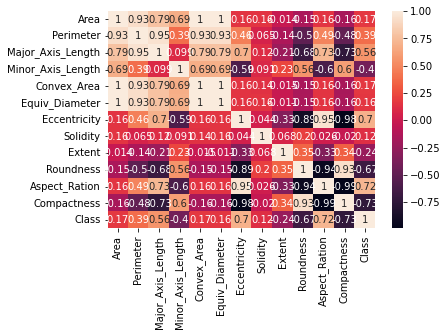

In [ ]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()


In [ ]:
corrMatrix.T

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
Area,1.000000,0.928548,0.789133,0.685304,0.999806,0.998464,0.159624,0.158388,-0.014018,-0.149378,0.159960,-0.160438,0.170280
Perimeter,0.928548,1.000000,0.946181,0.392913,0.929971,0.928055,0.464601,0.065340,-0.140600,-0.500968,0.487880,-0.484440,0.388345
Major_Axis_Length,0.789133,0.946181,1.000000,0.099376,0.789061,0.787078,0.704287,0.119291,-0.214990,-0.684972,0.729156,-0.726958,0.561458
Minor_Axis_Length,0.685304,0.392913,0.099376,1.000000,0.685634,0.690020,-0.590877,0.090915,0.233576,0.558566,-0.598475,0.603441,-0.401362
Convex_Area,0.999806,0.929971,0.789061,0.685634,1.000000,0.998289,0.159156,0.139178,-0.015449,-0.153615,0.159822,-0.160432,0.168029
Equiv_Diameter,0.998464,0.928055,0.787078,0.690020,0.998289,1.000000,0.156246,0.159454,-0.010970,-0.145313,0.155762,-0.156411,0.160303
Eccentricity,0.159624,0.464601,0.704287,-0.590877,0.159156,0.156246,1.000000,0.043991,-0.327316,-0.890651,0.950225,-0.981689,0.699319
Solidity,0.158388,0.065340,0.119291,0.090915,0.139178,0.159454,0.043991,1.000000,0.067537,0.200836,0.026410,-0.019967,0.122674
Extent,-0.014018,-0.140600,-0.214990,0.233576,-0.015449,-0.010970,-0.327316,0.067537,1.000000,0.352338,-0.329933,0.336984,-0.236076
Roundness,-0.149378,-0.500968,-0.684972,0.558566,-0.153615,-0.145313,-0.890651,0.200836,0.352338,1.000000,-0.935233,0.933308,-0.669514


In [ ]:
# On basis of correlation the values less than 0.3 correlation cannot be considered for model prediction.
# Area,Convex_Aea,Equiv_Diameter,Solidity

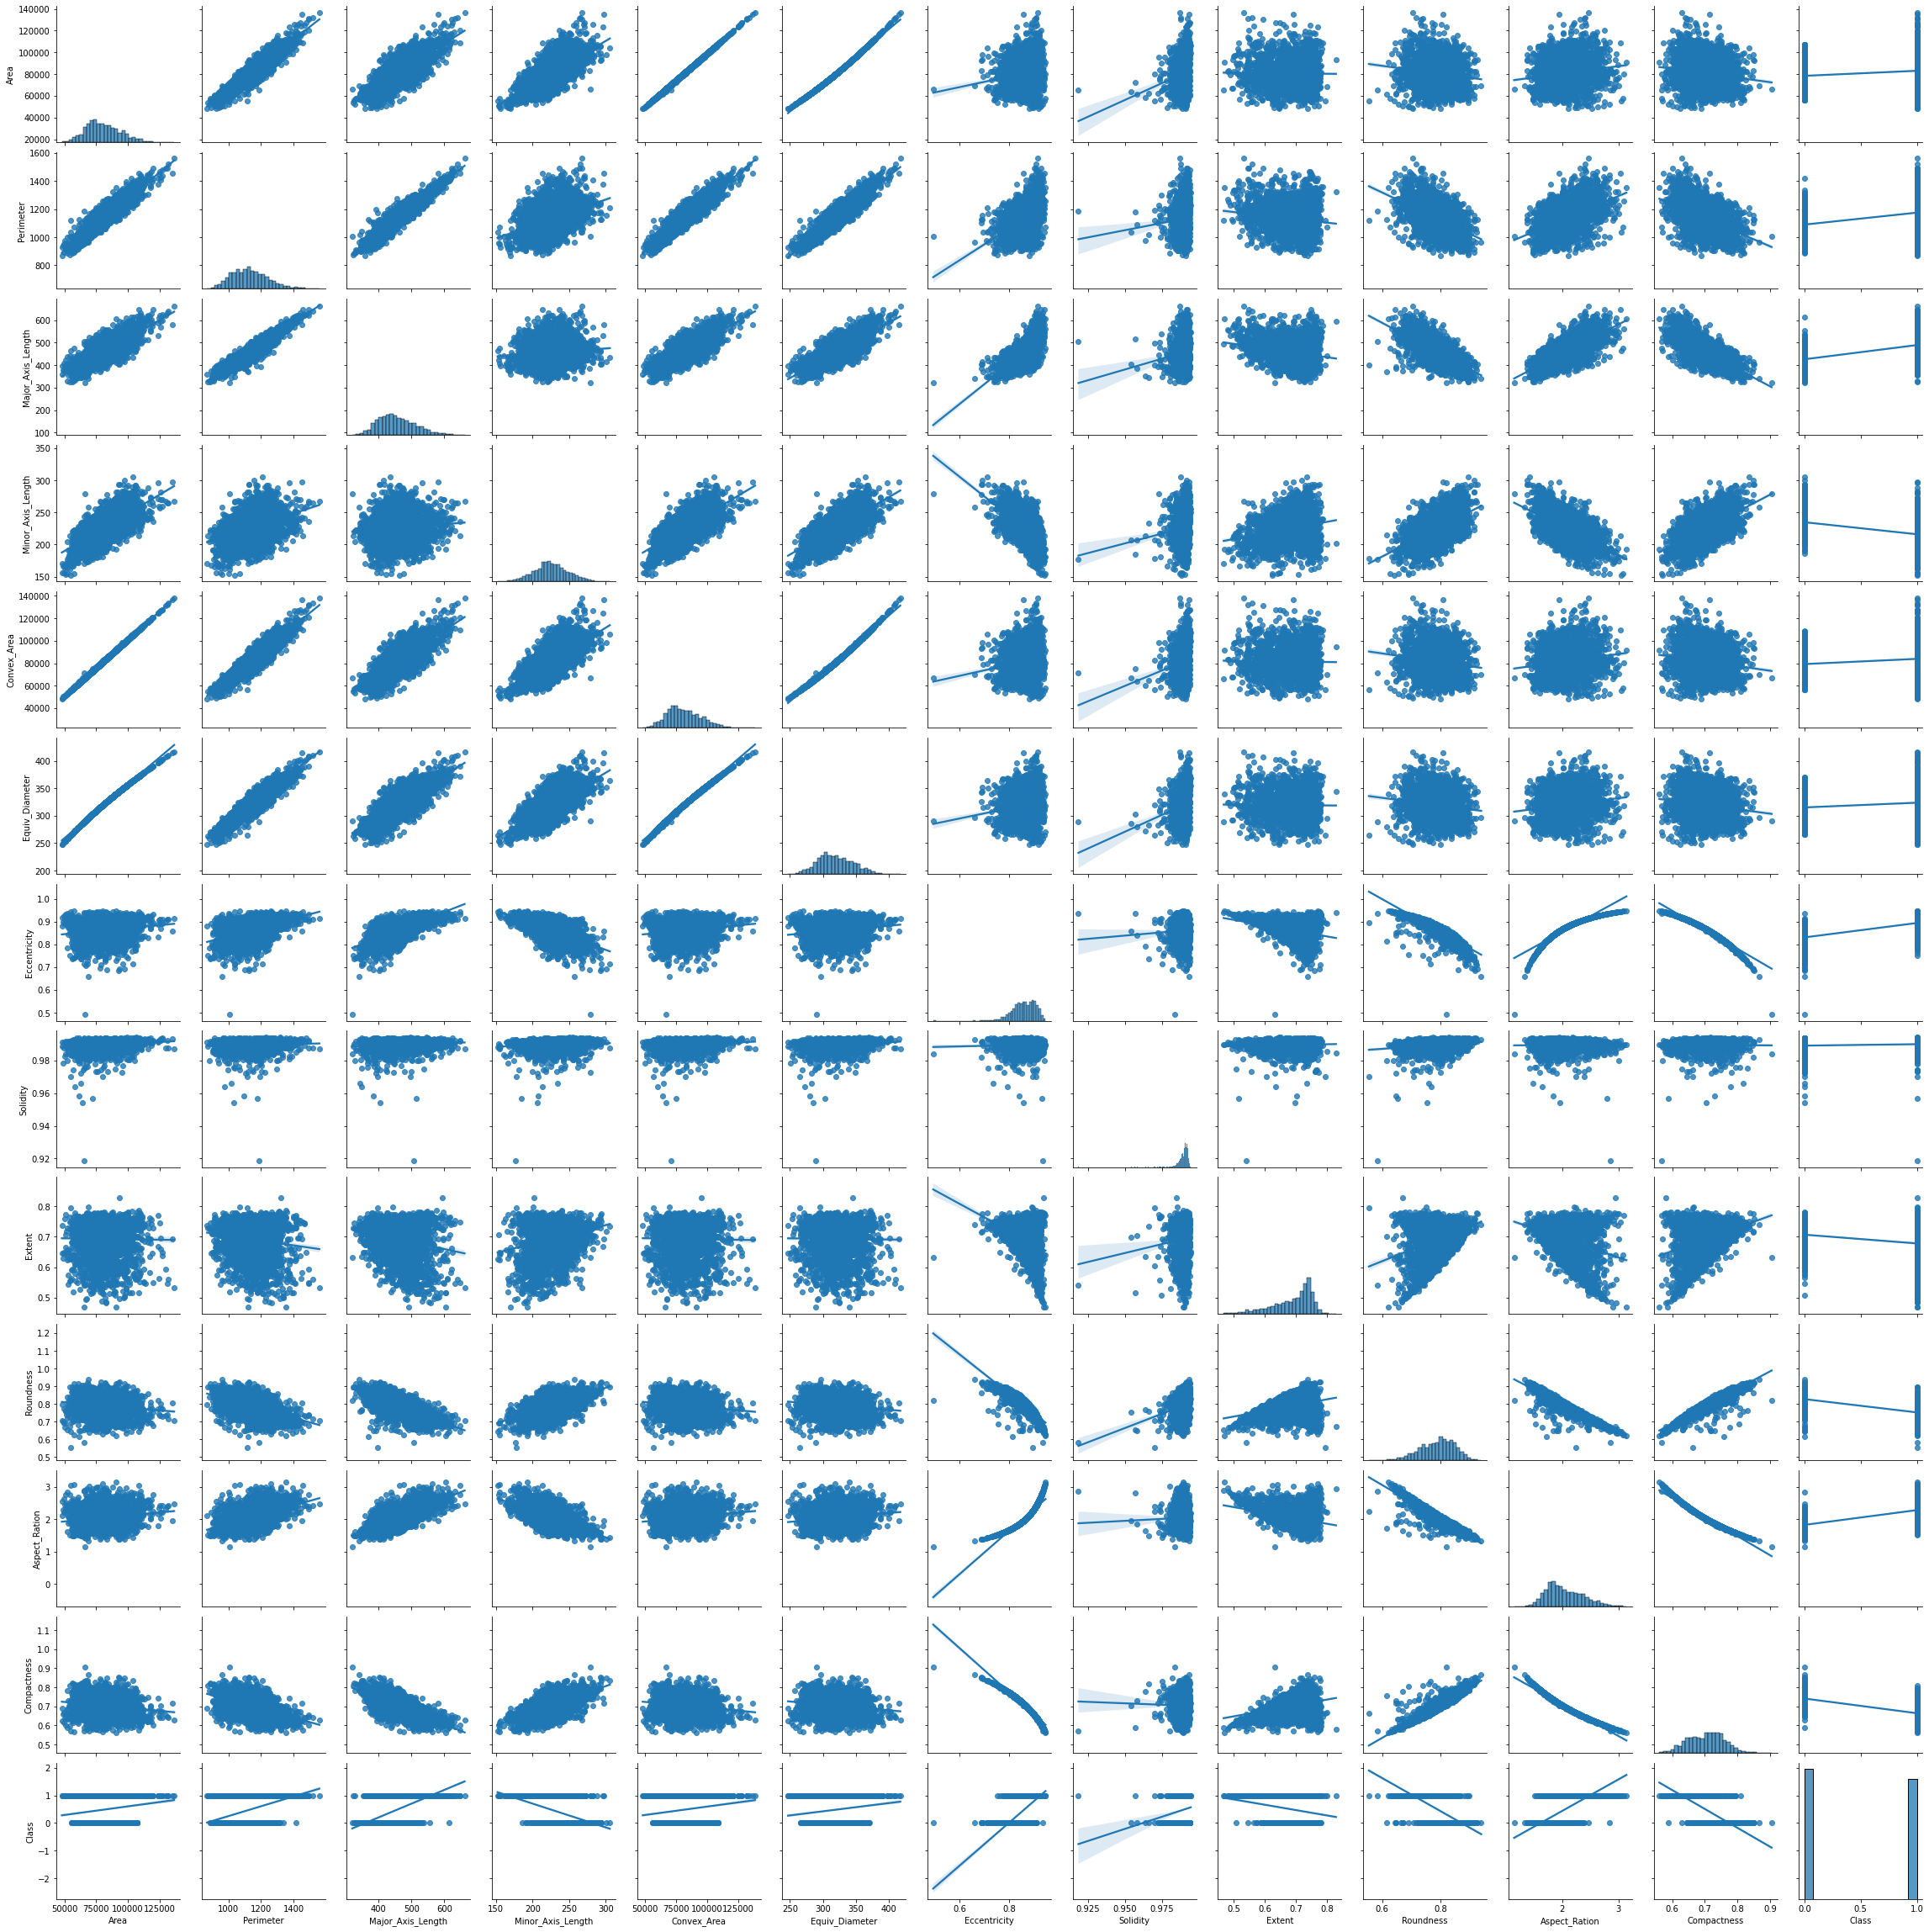

In [ ]:
sns.pairplot(df,kind='reg')
# to show
plt.show()

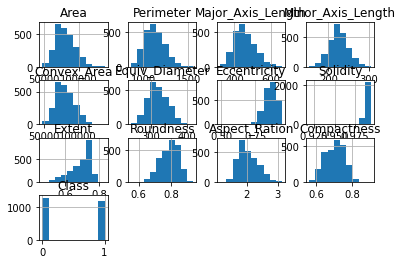

In [ ]:
df.hist()
plt.show()

In [ ]:
df.Compactness.value_counts()

0.7073    7
0.7264    7
0.7077    6
0.7414    6
0.7093    6
         ..
0.7617    1
0.7521    1
0.7761    1
0.7069    1
0.5973    1
Name: Compactness, Length: 1405, dtype: int64

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 254.0 KB


In [ ]:
Xx = df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11]]
y = df.iloc[:,[12]]
Xx.info()
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
dtypes: float64(10), int64(2)
memory usage: 234.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------

In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = Xx.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(Xx.values, i)
                          for i in range(len(Xx.columns))]
  
print(vif_data)

              feature            VIF
0                Area  703458.880182
1           Perimeter  486347.821896
2   Major_Axis_Length  260624.068868
3   Minor_Axis_Length  120021.104097
4         Convex_Area  725859.748151
5      Equiv_Diameter  564811.680104
6        Eccentricity   93591.274375
7            Solidity  488965.573579
8              Extent     151.416187
9           Roundness  120102.568806
10      Aspect_Ration   12236.853275
11        Compactness  264274.176655


In [ ]:
#without removing outliers an dless affecting columns, we will build the model

In [ ]:
#considering four variables
model1 = smf.glm(formula='''Class ~ Area+Perimeter+Major_Axis_Length+
                            Minor_Axis_Length+Convex_Area+Equiv_Diameter+
                            Eccentricity+Solidity+Extent+Roundness+Aspect_Ration+Compactness''', data=df, family=sm.families.Binomial())
result = model1.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Class   No. Observations:                 2500
Model:                            GLM   Df Residuals:                     2487
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -707.36
Date:                Fri, 02 Dec 2022   Deviance:                       1414.7
Time:                        00:29:50   Pearson chi2:                 1.82e+05
No. Iterations:                    28                                         
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           282.2818    194.05

In [ ]:
predictions = result.predict() 
predictions_nominal = [0 if x < 0.5 else 1 for x in predictions]
predictions_nominal 

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,


In [ ]:
#Confusion matrix
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix (df["Class"], predictions_nominal)
print(confusion_matrix)

[[1191  109]
 [ 171 1029]]


In [ ]:
accuracy_score = (1191+1029)/(1191+109+171+1029)
accuracy_score

0.888

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
model_auc = roc_auc_score(df["Class"], predictions)
print(model_auc)
# fpr, tpr, thresholds =roc_curve(df["Class"], predictions)
# roc_auc = auc(fpr, tpr) 
# print(roc_auc)

0.949103205128205


In [ ]:
#considering few variables, area,convex area,equiv_dia and solidity are not considered
model2 = smf.glm(formula='''Class ~ Perimeter+Major_Axis_Length+
                            Minor_Axis_Length+
                            Eccentricity+Extent+Roundness+Aspect_Ration+Compactness''', data=df, family=sm.families.Binomial())
result = model2.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Class   No. Observations:                 2500
Model:                            GLM   Df Residuals:                     2491
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -802.10
Date:                Fri, 02 Dec 2022   Deviance:                       1604.2
Time:                        00:38:31   Pearson chi2:                 7.16e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           103.9574     61.06

In [ ]:
predictions = result.predict() 
predictions_nominal = [0 if x < 0.5 else 1 for x in predictions]
predictions_nominal

[0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,


In [ ]:
#Confusion matrix

confusion_matrix = metrics.confusion_matrix (df["Class"], predictions_nominal)
print(confusion_matrix)

[[1168  132]
 [ 193 1007]]


In [ ]:
accuracy_score = (1168+1007)/(1168+1007+193+132)
accuracy_score

0.87

In [ ]:
# fpr, tpr, thresholds =roc_curve(df["Class"], predictions)
# roc_auc = auc(fpr, tpr) 
# print(roc_auc) #0.9346551282051282

model_auc = roc_auc_score(df["Class"], predictions)
print(model_auc)

0.9346551282051282


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
x = df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11]]
y = df.iloc[:,12]  

#solver liblinear
from sklearn.linear_model import LogisticRegression
model3 = LogisticRegression(solver='liblinear', random_state=0)
model3.fit(x, y)
model3.intercept_

array([0.01846977])

In [ ]:
y_pred = model3.predict(x)
y_pred

array([0, 0, 0, ..., 1, 1, 0])

In [ ]:
#Confusion matrix
from sklearn import metrics
cm = metrics.confusion_matrix(y, y_pred)
print(cm)

[[1191  109]
 [ 190 1010]]


In [ ]:
model3.score(x,y)

0.8804

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
y_pred_prob = model3.predict_proba(x)
fpr, tpr, thresholds =roc_curve(df["Class"], y_pred_prob[:,1])
roc_auc = auc(fpr, tpr) 
print(roc_auc)

0.9417333333333333


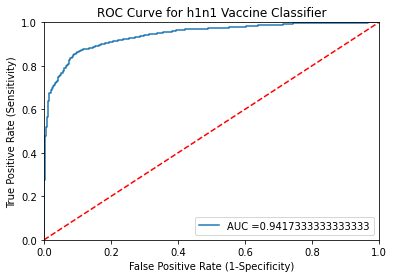

In [ ]:
#ROC Curve
plt.title('ROC Curve for h1n1 Vaccine Classifier')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(fpr, tpr, label = 'AUC =' +str(roc_auc))
plt.legend(loc=4) #Location of label
plt.show()

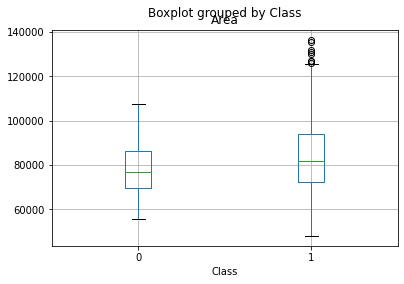

In [ ]:
df.boxplot('Area','Class')

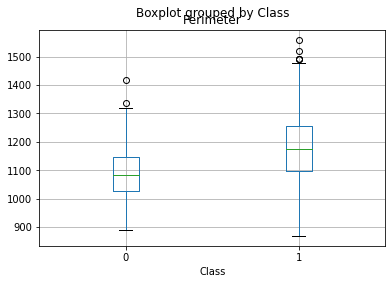

In [ ]:
df.boxplot('Perimeter','Class')

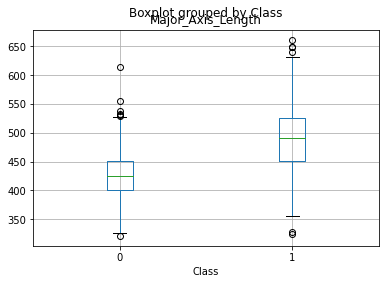

In [ ]:
df.boxplot('Major_Axis_Length','Class')

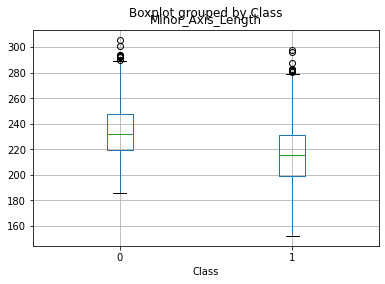

In [ ]:
df.boxplot('Minor_Axis_Length','Class')

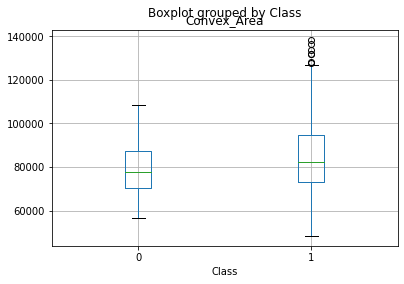

In [ ]:
df.boxplot('Convex_Area','Class')

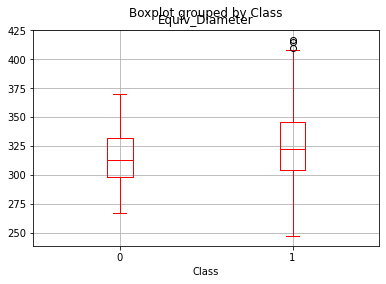

In [ ]:
df.boxplot('Equiv_Diameter','Class',color = 'red')

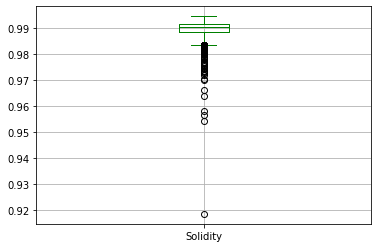

In [ ]:
df.boxplot('Solidity',color = 'green')

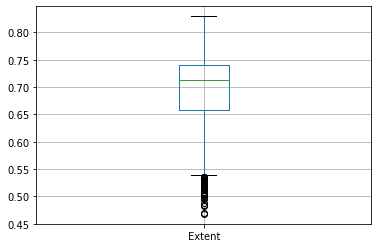

In [ ]:
df.boxplot('Extent')

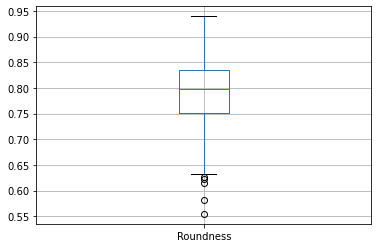

In [ ]:
df.boxplot('Roundness')

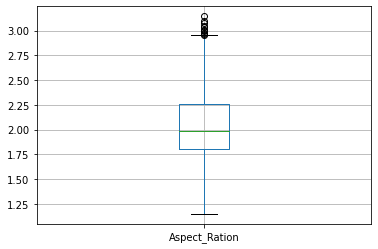

In [ ]:
df.boxplot('Aspect_Ration')

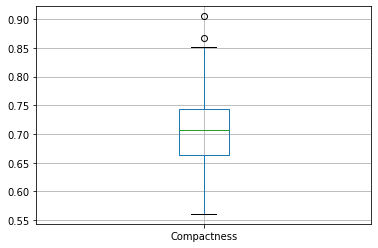

In [ ]:
df.boxplot('Compactness')

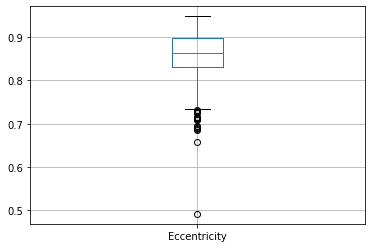

In [ ]:
df.boxplot('Eccentricity')

In [ ]:
def outliers(df, feature):
    Q1= df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit
upper, lower = outliers(df, "Extent")

print("Upper limit: ", upper)
print("Lower limit: ", lower)






Upper limit:  0.8622124999999997
Lower limit:  0.5369125000000002


In [ ]:
df[(df['Extent'] < lower) | (df['Extent'] > upper)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 187 to 2495
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               46 non-null     int64  
 1   Perimeter          46 non-null     float64
 2   Major_Axis_Length  46 non-null     float64
 3   Minor_Axis_Length  46 non-null     float64
 4   Convex_Area        46 non-null     int64  
 5   Equiv_Diameter     46 non-null     float64
 6   Eccentricity       46 non-null     float64
 7   Solidity           46 non-null     float64
 8   Extent             46 non-null     float64
 9   Roundness          46 non-null     float64
 10  Aspect_Ration      46 non-null     float64
 11  Compactness        46 non-null     float64
 12  Class              46 non-null     int64  
dtypes: float64(10), int64(3)
memory usage: 5.0 KB


In [ ]:
def outliers(df, feature):
    Q1= df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit
upper, lower = outliers(df, "Area")

print("Upper limit: ", upper)
print("Lower limit: ", lower)

Upper limit:  118246.25
Lower limit:  42276.25


In [ ]:
df[(df['Area'] < lower) | (df['Area'] > upper)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 1301 to 2453
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               18 non-null     int64  
 1   Perimeter          18 non-null     float64
 2   Major_Axis_Length  18 non-null     float64
 3   Minor_Axis_Length  18 non-null     float64
 4   Convex_Area        18 non-null     int64  
 5   Equiv_Diameter     18 non-null     float64
 6   Eccentricity       18 non-null     float64
 7   Solidity           18 non-null     float64
 8   Extent             18 non-null     float64
 9   Roundness          18 non-null     float64
 10  Aspect_Ration      18 non-null     float64
 11  Compactness        18 non-null     float64
 12  Class              18 non-null     int64  
dtypes: float64(10), int64(3)
memory usage: 2.0 KB


In [ ]:
upper, lower = outliers(df, "Perimeter")
df[(df['Perimeter'] < lower) | (df['Perimeter'] > upper)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 1301 to 2373
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               16 non-null     int64  
 1   Perimeter          16 non-null     float64
 2   Major_Axis_Length  16 non-null     float64
 3   Minor_Axis_Length  16 non-null     float64
 4   Convex_Area        16 non-null     int64  
 5   Equiv_Diameter     16 non-null     float64
 6   Eccentricity       16 non-null     float64
 7   Solidity           16 non-null     float64
 8   Extent             16 non-null     float64
 9   Roundness          16 non-null     float64
 10  Aspect_Ration      16 non-null     float64
 11  Compactness        16 non-null     float64
 12  Class              16 non-null     int64  
dtypes: float64(10), int64(3)
memory usage: 1.8 KB


In [ ]:
upper, lower = outliers(df, "Major_Axis_Length")
df[(df['Major_Axis_Length'] < lower) | (df['Major_Axis_Length'] > upper)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 226 to 2373
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               21 non-null     int64  
 1   Perimeter          21 non-null     float64
 2   Major_Axis_Length  21 non-null     float64
 3   Minor_Axis_Length  21 non-null     float64
 4   Convex_Area        21 non-null     int64  
 5   Equiv_Diameter     21 non-null     float64
 6   Eccentricity       21 non-null     float64
 7   Solidity           21 non-null     float64
 8   Extent             21 non-null     float64
 9   Roundness          21 non-null     float64
 10  Aspect_Ration      21 non-null     float64
 11  Compactness        21 non-null     float64
 12  Class              21 non-null     int64  
dtypes: float64(10), int64(3)
memory usage: 2.3 KB


In [ ]:
upper, lower = outliers(df, "Minor_Axis_Length")
df[(df['Minor_Axis_Length'] < lower) | (df['Minor_Axis_Length'] > upper)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 106 to 2490
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               30 non-null     int64  
 1   Perimeter          30 non-null     float64
 2   Major_Axis_Length  30 non-null     float64
 3   Minor_Axis_Length  30 non-null     float64
 4   Convex_Area        30 non-null     int64  
 5   Equiv_Diameter     30 non-null     float64
 6   Eccentricity       30 non-null     float64
 7   Solidity           30 non-null     float64
 8   Extent             30 non-null     float64
 9   Roundness          30 non-null     float64
 10  Aspect_Ration      30 non-null     float64
 11  Compactness        30 non-null     float64
 12  Class              30 non-null     int64  
dtypes: float64(10), int64(3)
memory usage: 3.3 KB


In [ ]:
upper, lower = outliers(df, "Convex_Area")
df[(df['Convex_Area'] < lower) | (df['Convex_Area'] > upper)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 1301 to 2453
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               17 non-null     int64  
 1   Perimeter          17 non-null     float64
 2   Major_Axis_Length  17 non-null     float64
 3   Minor_Axis_Length  17 non-null     float64
 4   Convex_Area        17 non-null     int64  
 5   Equiv_Diameter     17 non-null     float64
 6   Eccentricity       17 non-null     float64
 7   Solidity           17 non-null     float64
 8   Extent             17 non-null     float64
 9   Roundness          17 non-null     float64
 10  Aspect_Ration      17 non-null     float64
 11  Compactness        17 non-null     float64
 12  Class              17 non-null     int64  
dtypes: float64(10), int64(3)
memory usage: 1.9 KB


In [ ]:
upper, lower = outliers(df, "Equiv_Diameter")
df[(df['Equiv_Diameter'] < lower) | (df['Equiv_Diameter'] > upper)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 1424 to 2453
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               13 non-null     int64  
 1   Perimeter          13 non-null     float64
 2   Major_Axis_Length  13 non-null     float64
 3   Minor_Axis_Length  13 non-null     float64
 4   Convex_Area        13 non-null     int64  
 5   Equiv_Diameter     13 non-null     float64
 6   Eccentricity       13 non-null     float64
 7   Solidity           13 non-null     float64
 8   Extent             13 non-null     float64
 9   Roundness          13 non-null     float64
 10  Aspect_Ration      13 non-null     float64
 11  Compactness        13 non-null     float64
 12  Class              13 non-null     int64  
dtypes: float64(10), int64(3)
memory usage: 1.4 KB


In [ ]:
upper, lower = outliers(df, "Solidity")
df[(df['Solidity'] < lower) | (df['Solidity'] > upper)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 43 to 2480
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               103 non-null    int64  
 1   Perimeter          103 non-null    float64
 2   Major_Axis_Length  103 non-null    float64
 3   Minor_Axis_Length  103 non-null    float64
 4   Convex_Area        103 non-null    int64  
 5   Equiv_Diameter     103 non-null    float64
 6   Eccentricity       103 non-null    float64
 7   Solidity           103 non-null    float64
 8   Extent             103 non-null    float64
 9   Roundness          103 non-null    float64
 10  Aspect_Ration      103 non-null    float64
 11  Compactness        103 non-null    float64
 12  Class              103 non-null    int64  
dtypes: float64(10), int64(3)
memory usage: 11.3 KB


In [ ]:
upper, lower = outliers(df, "Roundness")
df[(df['Roundness'] < lower) | (df['Roundness'] > upper)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 1265 to 2456
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               5 non-null      int64  
 1   Perimeter          5 non-null      float64
 2   Major_Axis_Length  5 non-null      float64
 3   Minor_Axis_Length  5 non-null      float64
 4   Convex_Area        5 non-null      int64  
 5   Equiv_Diameter     5 non-null      float64
 6   Eccentricity       5 non-null      float64
 7   Solidity           5 non-null      float64
 8   Extent             5 non-null      float64
 9   Roundness          5 non-null      float64
 10  Aspect_Ration      5 non-null      float64
 11  Compactness        5 non-null      float64
 12  Class              5 non-null      int64  
dtypes: float64(10), int64(3)
memory usage: 560.0 bytes


In [ ]:
upper, lower = outliers(df, "Aspect_Ration")
df[(df['Aspect_Ration'] < lower) | (df['Aspect_Ration'] > upper)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 1321 to 2456
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               11 non-null     int64  
 1   Perimeter          11 non-null     float64
 2   Major_Axis_Length  11 non-null     float64
 3   Minor_Axis_Length  11 non-null     float64
 4   Convex_Area        11 non-null     int64  
 5   Equiv_Diameter     11 non-null     float64
 6   Eccentricity       11 non-null     float64
 7   Solidity           11 non-null     float64
 8   Extent             11 non-null     float64
 9   Roundness          11 non-null     float64
 10  Aspect_Ration      11 non-null     float64
 11  Compactness        11 non-null     float64
 12  Class              11 non-null     int64  
dtypes: float64(10), int64(3)
memory usage: 1.2 KB


In [ ]:
upper, lower = outliers(df, "Eccentricity")
df[(df['Eccentricity'] < lower) | (df['Eccentricity'] > upper)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 95 to 1273
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               18 non-null     int64  
 1   Perimeter          18 non-null     float64
 2   Major_Axis_Length  18 non-null     float64
 3   Minor_Axis_Length  18 non-null     float64
 4   Convex_Area        18 non-null     int64  
 5   Equiv_Diameter     18 non-null     float64
 6   Eccentricity       18 non-null     float64
 7   Solidity           18 non-null     float64
 8   Extent             18 non-null     float64
 9   Roundness          18 non-null     float64
 10  Aspect_Ration      18 non-null     float64
 11  Compactness        18 non-null     float64
 12  Class              18 non-null     int64  
dtypes: float64(10), int64(3)
memory usage: 2.0 KB


In [ ]:
df.Class.value_counts()

0    1300
1    1200
Name: Class, dtype: int64

In [ ]:
# it is not imbalanced.

In [ ]:
df1 =df.copy(deep = True)

In [ ]:
df1.columns

Index(['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Convex_Area', 'Equiv_Diameter', 'Eccentricity', 'Solidity', 'Extent',
       'Roundness', 'Aspect_Ration', 'Compactness', 'Class'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
to_be_scaled = df1[['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Convex_Area', 'Equiv_Diameter', 'Eccentricity', 'Solidity', 'Extent',
       'Roundness', 'Aspect_Ration', 'Compactness']]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(to_be_scaled)
df_scaled= pd.DataFrame(scaled_data, columns= to_be_scaled.columns)

In [ ]:
df_scaled.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
0,-1.784703,-2.215755,-2.320224,-0.238536,-1.793218,-1.921174,-2.729935,0.202812,0.855406,1.873763,-1.775063,2.197280
1,-0.294780,-0.568804,-0.700916,0.362089,-0.307244,-0.259343,-0.739163,0.603626,0.359523,0.938377,-0.824864,0.840230
2,-0.661350,-0.432940,-0.369395,-0.633215,-0.642749,-0.645380,0.310476,-1.085518,0.768380,-0.431615,0.074059,-0.211483
3,-1.039412,-1.265424,-1.334616,-0.140076,-1.045689,-1.057939,-1.075756,0.202812,0.761812,1.020648,-1.035351,1.098447
4,-1.065105,-1.209626,-1.293272,-0.229276,-1.045762,-1.086548,-0.934033,-1.285925,-0.295634,0.755950,-0.950840,0.972166


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 254.0 KB


In [ ]:
X = df_scaled.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11]]
y =df1.iloc[:,12]
print(X.info())
print(y)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   float64
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   float64
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
dtypes: float64(12)
memory usage: 234.5 KB
None
0       0
1       0
2       0
3       0
4       0
       ..
2495    1
2496    1
2497    1
2498    1
2499    1
Name: Class, Length: 2500, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1750, 12)
(750, 12)
(1750,)
(750,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


#solver liblinear
from sklearn.linear_model import LogisticRegression
model4 = LogisticRegression(solver='liblinear', random_state=0)
model4.fit(X_train, y_train)
model4.intercept_

#predictions
preds=model4.predict(X_test)
print(classification_report(y_test,preds))
cm = metrics.confusion_matrix(y_test, preds)
print(cm)

#predictions training
print("training_score")
preds_train=model4.predict(X_train)
print(classification_report(y_train,preds_train))
cm = metrics.confusion_matrix(y_train, preds_train)
print(cm)

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       390
           1       0.89      0.84      0.86       360

    accuracy                           0.87       750
   macro avg       0.87      0.87      0.87       750
weighted avg       0.87      0.87      0.87       750

[[351  39]
 [ 59 301]]
training_score
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       910
           1       0.90      0.85      0.88       840

    accuracy                           0.89      1750
   macro avg       0.89      0.88      0.88      1750
weighted avg       0.89      0.89      0.88      1750

[[831  79]
 [122 718]]


In [ ]:
# Now will perform RandomForest Classifier

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [ ]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 200}

In [ ]:
model5=RandomForestClassifier(criterion='gini',max_depth=8,max_features='log2',n_estimators=200)
model5.fit(X_train,y_train)
#predictions - test
y_pred2=model5.predict(X_test)

print("confusion matrix_test")
print(confusion_matrix(y_test,y_pred2))

print("classification report_test")
print(classification_report(y_test,y_pred2))

#predictions-train
y_pred2_train=model5.predict(X_train)
print("confusion matrix_train")
print(confusion_matrix(y_train,y_pred2_train))

print("classification report_train")
print(classification_report(y_train,y_pred2_train))

confusion matrix_test
[[348  42]
 [ 49 311]]
classification report_test
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       390
           1       0.88      0.86      0.87       360

    accuracy                           0.88       750
   macro avg       0.88      0.88      0.88       750
weighted avg       0.88      0.88      0.88       750

confusion matrix_train
[[896  14]
 [ 68 772]]
classification report_train
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       910
           1       0.98      0.92      0.95       840

    accuracy                           0.95      1750
   macro avg       0.96      0.95      0.95      1750
weighted avg       0.95      0.95      0.95      1750



In [ ]:
%pip install catboost
from catboost import CatBoostClassifier
catboost_params = {'loss_function' : 'CrossEntropy',
            'iterations': 2000,
            'depth': 5,
            'learning_rate': 0.01,
            'eval_metric': 'AUC',
            'random_seed': 4,
            'l2_leaf_reg': 15.0,
            'bagging_temperature': 0.75,
            'allow_writing_files': False, 'border_count':50
        }
model = CatBoostClassifier(**catboost_params)
model.fit(X_train, y_train,verbose=False)
# predictions
y_pred_catboost=model.predict(X_test)

print(classification_report(y_test, y_pred_catboost))

print(roc_auc_score(y_test,y_pred_catboost))

#predictions train
y_pred_catboost_train =model.predict(X_train)

print(classification_report(y_train, y_pred_catboost_train))

print(roc_auc_score(y_train,y_pred_catboost_train))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       390
           1       0.89      0.86      0.87       360

    accuracy                           0.88       750
   macro avg       0.88      0.88      0.88       750
weighted avg       0.88      0.88      0.88       750

0.8764957264957266
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       910
           1       0.95      0.91      0.93       840

    accuracy                           0.94      1750
   macro avg       0.94      0.94      0.94      1750
weighted avg       0.94      0.94      0.94      1750

0.9357142857142857


In [ ]:
# normal logistic regression is working well without overfitting with default parameters. Standard scaling is carried out, and model is fitted.
# before scaling of the data the misclassification was more, as compared to standard scaled data when fitted

In [ ]:
df2 = df.copy(deep=True)

In [ ]:
from sklearn import preprocessing

In [ ]:
scaler = preprocessing.RobustScaler()
to_be_scaled = df2[['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Convex_Area', 'Equiv_Diameter', 'Eccentricity', 'Solidity', 'Extent',
       'Roundness', 'Aspect_Ration', 'Compactness']]
robust_df = scaler.fit_transform(to_be_scaled)
robust_df = pd.DataFrame(robust_df,columns= to_be_scaled.columns)

In [ ]:
robust_df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
0,-1.200474,-1.523713,-1.585863,-0.151708,-1.194716,-1.309729,-1.930348,-0.03125,0.396557,1.195632,-1.091698,1.412059
1,-0.128735,-0.359367,-0.415319,0.323710,-0.134400,-0.130484,-0.554152,0.40625,0.025208,0.561116,-0.440540,0.512340
2,-0.392418,-0.263315,-0.175673,-0.464112,-0.373799,-0.404418,0.171450,-1.43750,0.331386,-0.368214,0.175479,-0.184942
3,-0.664368,-0.851857,-0.873399,-0.073773,-0.661317,-0.697173,-0.786835,-0.03125,0.326468,0.616924,-0.584784,0.683536
4,-0.682848,-0.812409,-0.843513,-0.144378,-0.661369,-0.717474,-0.688863,-1.65625,-0.465417,0.437367,-0.526869,0.599813


In [ ]:
X = robust_df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11]]
y =df2.iloc[:,12]
print(X.info())
print(y)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


#solver liblinear
from sklearn.linear_model import LogisticRegression
model4 = LogisticRegression(solver='liblinear', random_state=0)
model4.fit(X_train, y_train)
model4.intercept_

#predictions
preds=model4.predict(X_test)
print(classification_report(y_test,preds))
cm = metrics.confusion_matrix(y_test, preds)
print(cm)

#predictions training
print("training_score")
preds_train=model4.predict(X_train)
print(classification_report(y_train,preds_train))
cm = metrics.confusion_matrix(y_train, preds_train)
print(cm)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   float64
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   float64
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
dtypes: float64(12)
memory usage: 234.5 KB
None
0       0
1       0
2       0
3       0
4       0
       ..
2495    1
2496    1
2497    1
2498    1
2499    1
Name: Class, Length: 2500, dtype: int64
              precision

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
Xx = robust_df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11]]
y = df.iloc[:,[12]]
Xx.info()
y.info()

vif_data = pd.DataFrame()
vif_data["feature"] = Xx.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(Xx.values, i)
                          for i in range(len(Xx.columns))]
  
print(vif_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   float64
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   float64
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
dtypes: float64(12)
memory usage: 234.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0